# Lec05 - Logistic regression

- Section 0. loading data with preprocessing

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [11]:
# load the csv file using pandas
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)

In [3]:
# preprocessing
# expensive vs. non-expensive properties as the binary variable
# threshold = 0.8
df['property_value_discrete'] = 1
df.loc[df['property_value_median'] < 200000, 'property_value_discrete'] = 0

## Section 1. Logistic regression

In [4]:
# Assign the dependent and independent variables.
y = df['property_value_discrete']
X = df['inc_median_household']
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()
print("Parameters: ", results.params)

Optimization terminated successfully.
         Current function value: 0.418982
         Iterations 7
Parameters:  const                  -6.099189
inc_median_household    0.000108
dtype: float64


In [5]:
# summarize the results
print(results.summary())

                              Logit Regression Results                             
Dep. Variable:     property_value_discrete   No. Observations:                 4167
Model:                               Logit   Df Residuals:                     4165
Method:                                MLE   Df Model:                            1
Date:                     Tue, 28 Nov 2023   Pseudo R-squ.:                  0.3953
Time:                             16:47:32   Log-Likelihood:                -1745.9
converged:                            True   LL-Null:                       -2887.1
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.0992      0.191    -31.953      0.000      -6.473      -5.725
inc_median_household     0.0001   3.42e-06     31.461      0.

**Visualizing the logistic function**

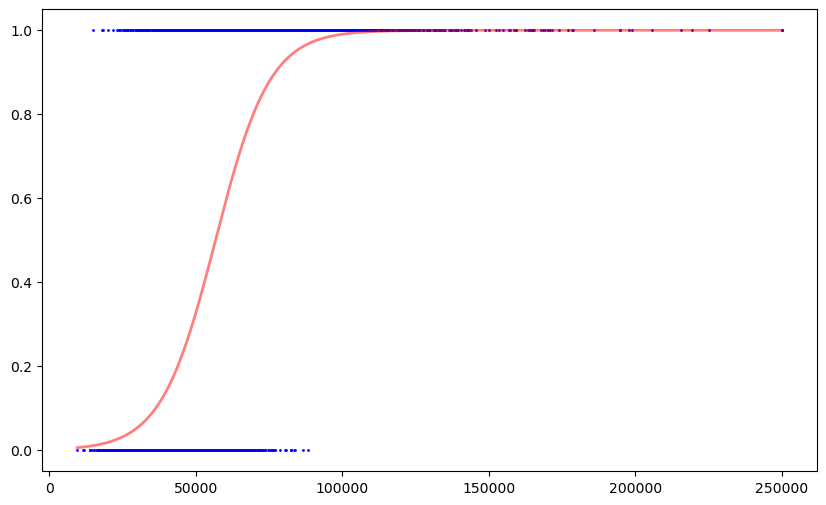

In [6]:
from scipy import stats
# scatter plot
# create an income array from the min to the max
inc_array = np.linspace(df['inc_median_household'].min(), df['inc_median_household'].max(), 2000) 
X_ = pd.DataFrame(inc_array, columns = ['inc_median_household'])
X_ = sm.add_constant(X_)
y_ = results.predict(X_)

# visualize the data points and the probability outputs.
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['inc_median_household'], df['property_value_discrete'], color = 'blue', s = 1)
ax.plot(inc_array, y_, color = 'red', linewidth = 2, alpha = 0.5)
plt.show()

In [7]:
# Regression 2. Enriching the logistic regression.
y = df['property_value_discrete']
X = df[['inc_median_household', 'households']]
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.418971
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     property_value_discrete   No. Observations:                 4167
Model:                               Logit   Df Residuals:                     4164
Method:                                MLE   Df Model:                            2
Date:                     Tue, 28 Nov 2023   Pseudo R-squ.:                  0.3953
Time:                             16:47:32   Log-Likelihood:                -1745.9
converged:                            True   LL-Null:                       -2887.1
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.1168      0.199    -3

In [8]:
# Regression 3. Enriching the logistic regression.
var_list = ['inc_median_household', 
            'households', #'pop_total',
            'travel_driving_ratio', 'travel_pt_ratio', 'travel_taxi_ratio', 'travel_work_home_ratio',
            'edu_higher_edu_ratio',
            'household_size_avg', 
            'vacancy_ratio', 'rent_median', 
            'race_white_ratio', #'race_black_ratio', 
            'race_asian_ratio'
            ]

y = df['property_value_discrete']
X = df[var_list]
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.342854
         Iterations 12
                              Logit Regression Results                             
Dep. Variable:     property_value_discrete   No. Observations:                 4167
Model:                               Logit   Df Residuals:                     4154
Method:                                MLE   Df Model:                           12
Date:                     Tue, 28 Nov 2023   Pseudo R-squ.:                  0.5052
Time:                             16:47:32   Log-Likelihood:                -1428.7
converged:                            True   LL-Null:                       -2887.1
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.0535      1.19

In [9]:
# compute the marginal effects without adjusting the unit
# check: https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.LogitResults.get_margeff.html
results.get_margeff(at = 'overall', method = 'dydx').summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
          Logit Marginal Effects          
==========================================
Dep. Variable:     property_value_discrete
Method:                               dydx
At:                                overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
inc_median_household    8.649e-06   4.43e-07     19.527      0.000    7.78e-06    9.52e-06
households              4.798e-06   5.33e-06      0.900      0.368   -5.65e-06    1.52e-05
travel_driving_ratio      -0.3506      0.130     -2.691      0.007      -0.606      -0.095
travel_pt_ratio            1.4302      0.219      6.525      0.000       1.001       1.860
travel_taxi_ratio          1.6487      0.680      2.423      0.015       0.315       2.982
travel_work_home_ratio    -0.1666      0.190     -0.879      0.380      -0.538       0.205
edu_higher_edu_ratio       0.8082      0.058     13.856      0.000       0.694       0.922
household_size_avg        -0.0009      0.001     -0.653      0.513      -0.004       0.002
vacancy_ratio             -0.0626      0.049     -1.272      0.203      -0.159       0.034
rent_median                0.0002   2.06e-05      9.748      0.000       0.000       0.000
race_white_ratio           0.1805      0.032      5.640      0.000       0.118       0.243
race_asian_ratio          -1.0590      0.200     -5.304      0.000      -1.450      -0.668
==========================================================================================
"""

## **Exercise.** Create a dummy variable to represent the auto vs. non-auto census tracts by using a threshold value. Then conduct several logistic regressions and choose the final model for interpretation.


In [10]:
df.columns

Index(['pop_total', 'sex_total', 'sex_male', 'sex_female', 'age_median',
       'households', 'race_total', 'race_white', 'race_black', 'race_native',
       'race_asian', 'inc_total_pop', 'inc_no_pop', 'inc_with_pop',
       'inc_pop_10k', 'inc_pop_1k_15k', 'inc_pop_15k_25k', 'inc_pop_25k_35k',
       'inc_pop_35k_50k', 'inc_pop_50k_65k', 'inc_pop_65k_75k', 'inc_pop_75k',
       'inc_median_ind', 'travel_total_to_work', 'travel_driving_to_work',
       'travel_pt_to_work', 'travel_taxi_to_work', 'travel_cycle_to_work',
       'travel_walk_to_work', 'travel_work_from_home', 'edu_total_pop',
       'bachelor_male_25_34', 'master_phd_male_25_34', 'bachelor_male_35_44',
       'master_phd_male_35_44', 'bachelor_male_45_64', 'master_phd_male_45_64',
       'bachelor_male_65_over', 'master_phd_male_65_over',
       'bachelor_female_25_34', 'master_phd_female_25_34',
       'bachelor_female_35_44', 'master_phd_female_35_44',
       'bachelor_female_45_64', 'master_phd_female_45_64',
       '